In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!pwd

/content


In [49]:
df = pd.read_csv('drive/My Drive/1er_Parcial_IA/rend_2016a2022_modificado.csv', encoding='latin-1')

In [50]:
df

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,Requisito,1R,2R,Nota.Final,periodo1,periodo2,periodo3,P1F,P2F,P3F
0,1,13224,INGENIERIA ECONOMICA,IND-PLS13,8,1,2022,2,1,2022,...,1,0,0,1F-5,1F,NaN,NaN,25,#N/D,#N/D
1,1,13013,CALCULO 3,IND-PLS13,3,2,2022,2,0,0,...,0,0,0,NaN,NaN,NaN,NaN,#N/D,#N/D,#N/D
2,1,13014,PROBABILIDAD Y ESTADISTICA,IND-PLS13,3,2,2022,2,0,0,...,0,0,0,NaN,NaN,NaN,NaN,#N/D,#N/D,#N/D
3,1,13203,TERMODINAMICA,IND-PLS13,5,2,2022,2,0,0,...,0,0,0,NaN,NaN,NaN,NaN,#N/D,#N/D,#N/D
4,2,13419,SISTEMAS DE CONTROL,ECA-PLS13,6,1,2022,2,1,2022,...,1,0,0,1F-5,1F,NaN,NaN,14,#N/D,#N/D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175434,4482,13229,ADMINISTRACION DE RR HH,IND-PLS13,10,1,2019,1,1,2019,...,1,0,0,1F-5,1F,NaN,NaN,30,#N/D,#N/D
175435,4482,2930,SIMULACION DE SISTEMAS PRODUCTIVOS,INT9-PROYT,13,1,2019,1,1,2019,...,1,0,0,1F-5,1F,NaN,NaN,30,#N/D,#N/D
175436,4483,13223,TECNOLOGIA DE LA INFORMACION,IND-PLS13,8,1,2019,1,1,2019,...,1,0,0,1F-5,1F,NaN,NaN,25,#N/D,#N/D
175437,4483,13229,ADMINISTRACION DE RR HH,IND-PLS13,10,1,2019,1,1,2019,...,1,0,0,1F-5,1F,NaN,NaN,30,#N/D,#N/D


In [51]:
df.columns

Index(['Idalumno', 'Cod.Asign', 'Asignatura', 'Cod.Car.Sec', 'Semestre',
       'Convocatoria', 'Anho', 'Ciclo', 'Aprobado', 'Firma.Anho', '1P', '2P',
       '3P', '4P', '4P_60', 'T', 'Asistencia', 'Requisito', '1R', '2R',
       'Nota.Final', 'periodo1', 'periodo2', 'periodo3', 'P1F', 'P2F', 'P3F'],
      dtype='object')

In [52]:
df = df[df['Anho']>2020]
df = df.drop(['3P'],axis = 1)
df = df.drop(['4P'],axis = 1)
df = df.drop(['4P_60'],axis = 1)
df.columns

Index(['Idalumno', 'Cod.Asign', 'Asignatura', 'Cod.Car.Sec', 'Semestre',
       'Convocatoria', 'Anho', 'Ciclo', 'Aprobado', 'Firma.Anho', '1P', '2P',
       'T', 'Asistencia', 'Requisito', '1R', '2R', 'Nota.Final', 'periodo1',
       'periodo2', 'periodo3', 'P1F', 'P2F', 'P3F'],
      dtype='object')

In [53]:
df.rename(columns={'Cod.Asign' : 'codAsig'},inplace = True)
df.rename(columns={'Nota.Final':'NF','Cod.Car.Sec':'Carrera','Firma.Anho': 'AnhoFirma'},inplace = True)
df.columns

Index(['Idalumno', 'codAsig', 'Asignatura', 'Carrera', 'Semestre',
       'Convocatoria', 'Anho', 'Ciclo', 'Aprobado', 'AnhoFirma', '1P', '2P',
       'T', 'Asistencia', 'Requisito', '1R', '2R', 'NF', 'periodo1',
       'periodo2', 'periodo3', 'P1F', 'P2F', 'P3F'],
      dtype='object')

In [54]:
#Aqui definimos la funcion que separara los datos
primerfinal=[]
segundofinal=[]
tercerfinal=[]

#Esta funcion identifica si el alumno rindio el primer, segundo o tercer final teniendo en cuenta que los finales rendidos se
#representan con 1F,2F o 3F

def separar(lista):
    global primerfinal
    global segundofinal
    global tercerfinal
    for nota in lista:
        if not(isinstance(nota, str)):
            primerfinal.append(0)
            segundofinal.append(0)
            tercerfinal.append(0)
        else:
            if '1F' in nota:
                n=nota.find('1F')
                primerfinal.append(int(nota[n+3]))
            else:
                primerfinal.append(0)

            if '2F' in nota:
                n=nota.find('2F')
                segundofinal.append(int(nota[n+3]))
            else:
                segundofinal.append(0)

            if '3F' in nota:
                n=nota.find('3F')
                tercerfinal.append(int(nota[n+3]))
            else:
                tercerfinal.append(0)

def maximo(a,b,c):
    """
    Esta funcion obtiene la nota mas alta obtenida por el alumno durante los finales. Esta funcion se
    utiliza para obtener la nota final
    """
    salida=np.zeros(len(a))
    for i in range(len(a)):
        if a[i]>=b[i] and a[i]>=c[i]:
            salida[i]=int(a[i])
        elif b[i]>=c[i]:
            salida[i]=int(b[i])
        else:
            salida[i]=int(c[i])
    return salida.astype(np.int64)

#Cargamos el contenido de 'Nota.Final' en una lista, para asi introducir la lista en la funcion
listaNotas=df["NF"].tolist()
separar(listaNotas)

#Creamos nuevas columnas en el df y le cargamos los vectores con los datos
df['1F']=primerfinal
df['2F']=segundofinal
df['3F']=tercerfinal

#Hallamos la nota final y la cargamos en una nueva columna en el df
nota_final=maximo(primerfinal,segundofinal,tercerfinal)
df['NF']=nota_final

In [55]:
df

,Idalumno,codAsig,Asignatura,Carrera,Semestre,Convocatoria,Anho,Ciclo,Aprobado,AnhoFirma,...,NF,periodo1,periodo2,periodo3,P1F,P2F,P3F,1F,2F,3F
0,1,13224,INGENIERIA ECONOMICA,IND-PLS13,8,1,2022,2,1,2022,...,5,1F,NaN,NaN,25,#N/D,#N/D,5,0,0
1,1,13013,CALCULO 3,IND-PLS13,3,2,2022,2,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
2,1,13014,PROBABILIDAD Y ESTADISTICA,IND-PLS13,3,2,2022,2,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
3,1,13203,TERMODINAMICA,IND-PLS13,5,2,2022,2,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
4,2,13419,SISTEMAS DE CONTROL,ECA-PLS13,6,1,2022,2,1,2022,...,5,1F,NaN,NaN,14,#N/D,#N/D,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175401,4476,13002,CALCULO 1,CIV-PLS13,1,1,2022,2,1,2022,...,2,1F,NaN,NaN,13,#N/D,#N/D,2,0,0
175402,4476,13003,GEOMETRIA ANALITICA,CIV-PLS13,1,1,2022,2,1,2022,...,4,1F,NaN,NaN,26,#N/D,#N/D,4,0,0
175403,4476,13004,ALGEBRA LINEAL 1,CIV-PLS13,1,1,2022,2,1,2022,...,4,1F,NaN,NaN,23,#N/D,#N/D,4,0,0
175404,4476,13005,DIBUJO TECNICO,CIV-PLS13,1,1,2022,2,0,2022,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0


In [56]:
df['Asignatura'].unique()

array(['INGENIERIA ECONOMICA', 'CALCULO 3', 'PROBABILIDAD Y ESTADISTICA',
       'TERMODINAMICA', 'SISTEMAS DE CONTROL', 'REDES INDUSTRIALES',
       'FISICA DE SEMICONDUCTORES', 'SISTEMAS DE REDES 2',
       'SISTEMAS HIDRAULICOS Y NEUMATICOS', 'HIDROTECNIA 1',
       'HIDRAULICA 2', 'HORMIGON ARMADO 1', 'MANTENIMIENTO DE CAMINOS',
       'MODELACION COMPUTACIONAL DE ESTRUCTURAS-METODO ELEM. FINITO',
       'CONSTRUCCIONES SOSTENIBLES', 'GEOTECNIA 2',
       'VIAS DE COMUNICACION 1', 'INTRODUCCION A LA INVESTIGACION',
       'ORGANIZACION DE EMPRESAS', 'SEGURIDAD EN EL TRABAJO',
       'FORMULACION Y GESTION DE PROYECTOS',
       'SISTEMA DE PLANIFICACION ESTRATEGICA', 'SISTEMA DE CALIDAD',
       'INVESTIGACION DE OPERACIONES 1',
       'PLANEAMIENTO Y CONTROL DE PRODUCCION', 'ELEMENTOS DE MAQUINAS',
       'MAQUINAS HIDRAULICAS', 'PROCESOS DE FABRICACION 1',
       'TRANSFERENCIA DE CALOR', 'PROCESOS DE FABRICACION 2',
       'DISEÑO DE INSTALACIONES P/ INSDUSTRIAS 2',
       'INSTR

In [57]:
df_resis = df[df['Asignatura']=='MECANICA DE MATERIALES 1']
df_resis

,Idalumno,codAsig,Asignatura,Carrera,Semestre,Convocatoria,Anho,Ciclo,Aprobado,AnhoFirma,...,NF,periodo1,periodo2,periodo3,P1F,P2F,P3F,1F,2F,3F
548,50,13019,MECANICA DE MATERIALES 1,MEC-PLS13,4,1,2021,1,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
555,50,13019,MECANICA DE MATERIALES 1,MEC-PLS13,4,2,2021,2,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
558,50,13019,MECANICA DE MATERIALES 1,MEC-PLS13,4,1,2022,1,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
562,50,13019,MECANICA DE MATERIALES 1,MEC-PLS13,4,2,2022,2,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
1128,73,13019,MECANICA DE MATERIALES 1,CIV-PLS13,4,1,2021,1,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174496,4444,13019,MECANICA DE MATERIALES 1,CIV-PLS13,4,1,2022,1,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
174500,4444,13019,MECANICA DE MATERIALES 1,CIV-PLS13,4,2,2022,2,1,2022,...,5,1F,NaN,NaN,19,#N/D,#N/D,5,0,0
174921,4459,13019,MECANICA DE MATERIALES 1,CIV-PLS13,4,1,2021,1,1,2021,...,2,NaN,2F,NaN,#N/D,21,#N/D,0,2,0
175008,4460,13019,MECANICA DE MATERIALES 1,MEC-PLS13,4,2,2021,2,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0


In [ ]:
df_new.g

In [58]:
df_new = df_resis.drop('Asignatura',axis=1)
df_new = df_new.drop(['codAsig'],axis=1)
df_new

,Idalumno,Carrera,Semestre,Convocatoria,Anho,Ciclo,Aprobado,AnhoFirma,1P,2P,...,NF,periodo1,periodo2,periodo3,P1F,P2F,P3F,1F,2F,3F
548,50,MEC-PLS13,4,1,2021,1,0,0,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
555,50,MEC-PLS13,4,2,2021,2,0,0,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
558,50,MEC-PLS13,4,1,2022,1,0,0,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
562,50,MEC-PLS13,4,2,2022,2,0,0,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
1128,73,CIV-PLS13,4,1,2021,1,0,0,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174496,4444,CIV-PLS13,4,1,2022,1,0,0,13,6,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0
174500,4444,CIV-PLS13,4,2,2022,2,1,2022,16,30,...,5,1F,NaN,NaN,19,#N/D,#N/D,5,0,0
174921,4459,CIV-PLS13,4,1,2021,1,1,2021,8,16,...,2,NaN,2F,NaN,#N/D,21,#N/D,0,2,0
175008,4460,MEC-PLS13,4,2,2021,2,0,0,0,0,...,0,NaN,NaN,NaN,#N/D,#N/D,#N/D,0,0,0


In [59]:
df_new['Carrera'].unique()

array(['MEC-PLS13 ', 'CIV-PLS13 ', 'ELE-PLS13 ', 'IND-PLS13 '],
      dtype=object)

In [60]:
Carreras = pd.get_dummies(df_new['Carrera'])
Carreras = Carreras.rename(columns = {'CIV-PLS13 ':'Civil','ELE-PLS13 ':'Electronica','IND-PLS13 ':'Industrial','MEC-PLS13 ':'Mecanica'})
Carreras #HAY QUE CONCATENAR ESTAS COLUMNAS Y ELIMINAR LA COLUMNA DE CARRERA

,Civil,Electronica,Industrial,Mecanica
548,0,0,0,1
555,0,0,0,1
558,0,0,0,1
562,0,0,0,1
1128,1,0,0,0
...,...,...,...,...
174496,1,0,0,0
174500,1,0,0,0
174921,1,0,0,0
175008,0,0,0,1


In [61]:
df_new = df_new.drop('Carrera',axis=1)

In [62]:
df_new = pd.concat([df_new,Carreras],axis=1)

In [63]:
df_new.shape

(1606, 28)

In [64]:
df_new.columns

Index(['Idalumno', 'Semestre', 'Convocatoria', 'Anho', 'Ciclo', 'Aprobado',
       'AnhoFirma', '1P', '2P', 'T', 'Asistencia', 'Requisito', '1R', '2R',
       'NF', 'periodo1', 'periodo2', 'periodo3', 'P1F', 'P2F', 'P3F', '1F',
       '2F', '3F', 'Civil', 'Electronica', 'Industrial', 'Mecanica'],
      dtype='object')

In [65]:
Firma = []
for anho,anhofirma in zip(df_new['Anho'],df_new['AnhoFirma']):
  if anhofirma==anho or anhofirma==0:
    Firma.append(0)
  else:
    Firma.append(1)
df_new.rename(columns={'AnhoFirma':'Firma'},inplace = True)
df_new['Firma'] = Firma

In [66]:
df_new

,Idalumno,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma,1P,2P,T,...,P1F,P2F,P3F,1F,2F,3F,Civil,Electronica,Industrial,Mecanica
548,50,4,1,2021,1,0,0,0,0,2,...,#N/D,#N/D,#N/D,0,0,0,0,0,0,1
555,50,4,2,2021,2,0,0,0,0,0,...,#N/D,#N/D,#N/D,0,0,0,0,0,0,1
558,50,4,1,2022,1,0,0,0,0,0,...,#N/D,#N/D,#N/D,0,0,0,0,0,0,1
562,50,4,2,2022,2,0,0,0,0,0,...,#N/D,#N/D,#N/D,0,0,0,0,0,0,1
1128,73,4,1,2021,1,0,0,0,0,0,...,#N/D,#N/D,#N/D,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174496,4444,4,1,2022,1,0,0,13,6,4,...,#N/D,#N/D,#N/D,0,0,0,1,0,0,0
174500,4444,4,2,2022,2,1,0,16,30,9,...,19,#N/D,#N/D,5,0,0,1,0,0,0
174921,4459,4,1,2021,1,1,0,8,16,6,...,#N/D,21,#N/D,0,2,0,1,0,0,0
175008,4460,4,2,2021,2,0,0,0,0,0,...,#N/D,#N/D,#N/D,0,0,0,0,0,0,1


In [67]:
Anho = pd.get_dummies(df_new['Anho'])
#AnhoFirma = pd.get_dummies(df_resis['AnhoFirma']) #ESTE PARAMENTRO NO ME RIRVE COMO ENTRADA PERO SI PARA SABER SI EL ALUMNO CURSO CON FIRMA O NO LA MATERIA
Anho = Anho.rename(columns={2021:'Anho2021',2022:'Anho2022'})
#AnhoFirma = AnhoFirma.rename(columns={2020:'Firma2020',2021:'Firma2021',2022:'Firma2022'})
#AnhoFirma = AnhoFirma.drop([0],axis=1)
Anho #HAY QUE CONCATENAR ESTAS COLUMNAS Y ELIMINAR LA COLUMNA DE ANHO

,Anho2021,Anho2022
548,1,0
555,1,0
558,0,1
562,0,1
1128,1,0
...,...,...
174496,0,1
174500,0,1
174921,1,0
175008,1,0


In [68]:
df_new = pd.concat([df_new,Anho],axis=1)

In [69]:
Recursando = []
id_ant = 0
for id in df_new['Idalumno']:
  if id == id_ant:
    Recursando.append(1)
  else:
    Recursando.append(0)
    id_ant = id
Recursando

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,


In [70]:
df_new['Recursando']=Recursando
df_new

,Idalumno,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma,1P,2P,T,...,1F,2F,3F,Civil,Electronica,Industrial,Mecanica,Anho2021,Anho2022,Recursando
548,50,4,1,2021,1,0,0,0,0,2,...,0,0,0,0,0,0,1,1,0,0
555,50,4,2,2021,2,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
558,50,4,1,2022,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
562,50,4,2,2022,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1128,73,4,1,2021,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174496,4444,4,1,2022,1,0,0,13,6,4,...,0,0,0,1,0,0,0,0,1,0
174500,4444,4,2,2022,2,1,0,16,30,9,...,5,0,0,1,0,0,0,0,1,1
174921,4459,4,1,2021,1,1,0,8,16,6,...,0,2,0,1,0,0,0,1,0,0
175008,4460,4,2,2021,2,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [71]:
df_new.isna()

,Idalumno,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma,1P,2P,T,...,1F,2F,3F,Civil,Electronica,Industrial,Mecanica,Anho2021,Anho2022,Recursando
548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174500,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174921,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
175008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
Asignaturas = pd.get_dummies(df['Asignatura'])
tabla = pd.concat([df['Idalumno'],df['Anho'],df['Ciclo'],Asignaturas],axis=1)
tabla

,Idalumno,Anho,Ciclo,ACONDICIONAMIENTO DEL AIRE Y REFRIGERACION,ACTUADORES Y MAQUINAS ELECTRICAS,ADMINISTRACION DE RR HH,ADMINISTRACION FINANCIERA,AERODINAMICA DE LAS CONSTRUCCIONES,AGUAS SUBTERRANEAS,AIRE ACONDICIONADO Y REFRIGERACION,...,TOPOGRAFIA DE OBRA,TOPOGRAFIA I,TRANSFERENCIA DE CALOR,TRANSMISION DE ENERGIA ELECTRICA,TRATAMIENTO DE AGUAS,TRATAMIENTO DE EFLUENTES,VIAS DE COMUNICACION 1,VIAS DE COMUNICACION 2,VIAS DE COMUNICACION 3,VIBRACIONES MECANICAS
0,1,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175401,4476,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175402,4476,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175403,4476,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175404,4476,2022,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
tabla_1 = tabla[tabla['Ciclo']==1]
tabla_2 = tabla[tabla['Ciclo']==2]

In [74]:
columnas1 = tabla_1.columns
columnas1 = columnas1[3:]
columnas2 = tabla_2.columns
columnas2 = columnas2[3:]
columnas1,columnas2

(Index(['ACONDICIONAMIENTO DEL AIRE Y REFRIGERACION',
        'ACTUADORES Y MAQUINAS ELECTRICAS', 'ADMINISTRACION DE RR HH',
        'ADMINISTRACION FINANCIERA  ', 'AERODINAMICA DE LAS CONSTRUCCIONES',
        'AGUAS SUBTERRANEAS', 'AIRE ACONDICIONADO Y REFRIGERACION',
        'ALGEBRA LINEAL 1', 'ALGEBRA LINEAL 2', 'ALGORITMOS 1',
        ...
        'TOPOGRAFIA DE OBRA', 'TOPOGRAFIA I', 'TRANSFERENCIA DE CALOR',
        'TRANSMISION DE ENERGIA  ELECTRICA', 'TRATAMIENTO DE AGUAS',
        'TRATAMIENTO DE EFLUENTES', 'VIAS DE COMUNICACION 1',
        'VIAS DE COMUNICACION 2', 'VIAS DE COMUNICACION 3',
        'VIBRACIONES MECANICAS'],
       dtype='object', length=310),
 Index(['ACONDICIONAMIENTO DEL AIRE Y REFRIGERACION',
        'ACTUADORES Y MAQUINAS ELECTRICAS', 'ADMINISTRACION DE RR HH',
        'ADMINISTRACION FINANCIERA  ', 'AERODINAMICA DE LAS CONSTRUCCIONES',
        'AGUAS SUBTERRANEAS', 'AIRE ACONDICIONADO Y REFRIGERACION',
        'ALGEBRA LINEAL 1', 'ALGEBRA LINEAL 2', 'AL

In [75]:
tab_pivot_1 = tabla_1.pivot_table(index=['Idalumno','Anho'],columns='Ciclo',values=columnas1,aggfunc='sum')
tab_pivot_1 = tab_pivot_1.fillna(0)
tab_pivot_2 = tabla_2.pivot_table(index=['Idalumno','Anho'],columns='Ciclo',values=columnas2,aggfunc='sum')
tab_pivot_2 = tab_pivot_2.fillna(0)
tab_pivot_2

,,ACONDICIONAMIENTO DEL AIRE Y REFRIGERACION,ACTUADORES Y MAQUINAS ELECTRICAS,ADMINISTRACION DE RR HH,ADMINISTRACION FINANCIERA,AERODINAMICA DE LAS CONSTRUCCIONES,AGUAS SUBTERRANEAS,AIRE ACONDICIONADO Y REFRIGERACION,ALGEBRA LINEAL 1,ALGEBRA LINEAL 2,ALGORITMOS 1,...,TOPOGRAFIA DE OBRA,TOPOGRAFIA I,TRANSFERENCIA DE CALOR,TRANSMISION DE ENERGIA ELECTRICA,TRATAMIENTO DE AGUAS,TRATAMIENTO DE EFLUENTES,VIAS DE COMUNICACION 1,VIAS DE COMUNICACION 2,VIAS DE COMUNICACION 3,VIBRACIONES MECANICAS
,Ciclo,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Idalumno,Anho,,,,,,,,,,,,,,,,,,,,,
1,2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2022,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,2021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4472,2022,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
suma_1 = tab_pivot_1.sum(axis=1)
suma_2 = tab_pivot_2.sum(axis=1)
suma_1,suma_2

(Idalumno  Anho
 4         2022    6
 8         2022    4
 9         2022    4
 14        2021    1
 23        2021    5
                  ..
 4470      2022    6
 4471      2021    2
           2022    1
 4475      2021    6
           2022    7
 Length: 4967, dtype: int64,
 Idalumno  Anho
 1         2022    4
 2         2022    5
 3         2022    6
 5         2022    5
 6         2022    5
                  ..
 4471      2021    1
 4472      2022    6
 4475      2021    6
           2022    5
 4476      2022    6
 Length: 5142, dtype: int64)

In [77]:
CantMaterias = []
for anho,ciclo,id in zip(df_new['Anho'],df_new['Ciclo'],df_new['Idalumno']):
  if ciclo == 1:
    CantMaterias.append(suma_1[(id,anho)])
  elif ciclo == 2:
    CantMaterias.append(suma_2[(id,anho)])
len(CantMaterias) #ESTA COLUMNA HAY QUE CONCATENAR

1606

In [78]:
df_new = df_new.drop('Anho',axis=1)

In [79]:
CantMaterias,len(CantMaterias)

([6,
  4,
  3,
  5,
  6,
  7,
  4,
  5,
  3,
  5,
  2,
  3,
  3,
  2,
  3,
  3,
  1,
  3,
  2,
  1,
  3,
  3,
  3,
  6,
  8,
  6,
  5,
  6,
  8,
  7,
  5,
  4,
  4,
  4,
  6,
  4,
  4,
  4,
  6,
  6,
  6,
  4,
  6,
  6,
  5,
  6,
  3,
  5,
  8,
  4,
  5,
  8,
  7,
  8,
  5,
  5,
  8,
  6,
  4,
  3,
  4,
  3,
  3,
  5,
  4,
  5,
  3,
  4,
  5,
  6,
  2,
  7,
  7,
  7,
  3,
  5,
  6,
  3,
  5,
  7,
  3,
  5,
  3,
  5,
  7,
  6,
  8,
  8,
  7,
  4,
  8,
  8,
  7,
  6,
  7,
  4,
  6,
  3,
  5,
  7,
  8,
  5,
  8,
  8,
  2,
  5,
  3,
  5,
  5,
  7,
  5,
  8,
  7,
  5,
  6,
  5,
  5,
  8,
  7,
  6,
  3,
  7,
  7,
  6,
  3,
  4,
  6,
  1,
  4,
  5,
  3,
  4,
  6,
  6,
  8,
  7,
  5,
  8,
  7,
  8,
  7,
  7,
  8,
  4,
  5,
  6,
  5,
  5,
  3,
  8,
  8,
  6,
  4,
  8,
  4,
  4,
  7,
  8,
  8,
  5,
  5,
  6,
  5,
  3,
  3,
  8,
  4,
  6,
  5,
  5,
  3,
  5,
  4,
  6,
  8,
  7,
  5,
  8,
  8,
  5,
  8,
  8,
  7,
  8,
  6,
  8,
  5,
  5,
  4,
  6,
  4,
  2,
  3,
  2,
  5,
  3,
  3,
  3,
  5,
  5,


In [80]:
df_new['CantMaterias'] = CantMaterias
df_new

,Idalumno,Semestre,Convocatoria,Ciclo,Aprobado,Firma,1P,2P,T,Asistencia,...,2F,3F,Civil,Electronica,Industrial,Mecanica,Anho2021,Anho2022,Recursando,CantMaterias
548,50,4,1,1,0,0,0,0,2,1,...,0,0,0,0,0,1,1,0,0,6
555,50,4,2,2,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,4
558,50,4,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,3
562,50,4,2,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,5
1128,73,4,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174496,4444,4,1,1,0,0,13,6,4,1,...,0,0,1,0,0,0,0,1,0,5
174500,4444,4,2,2,1,0,16,30,9,1,...,0,0,1,0,0,0,0,1,1,5
174921,4459,4,1,1,1,0,8,16,6,1,...,2,0,1,0,0,0,1,0,0,4
175008,4460,4,2,2,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,7


In [81]:
df_new.shape

(1606, 31)

In [82]:
Ciclo = pd.get_dummies(df_new['Ciclo'])
Convocatoria = pd.get_dummies(df_new['Convocatoria'])
Ciclo

,1,2
548,1,0
555,0,1
558,1,0
562,0,1
1128,1,0
...,...,...
174496,1,0
174500,0,1
174921,1,0
175008,0,1


In [83]:
Convocatoria

,1,2
548,1,0
555,0,1
558,1,0
562,0,1
1128,1,0
...,...,...
174496,1,0
174500,0,1
174921,1,0
175008,0,1


In [84]:
Ciclo = Ciclo[2]
Convocatoria = Convocatoria[2]
df_new['Ciclo'] = Ciclo
df_new['Convocatoria'] = Convocatoria

In [85]:
#EN ESTA CELDA HACEMOS EL ETIQUETADO DE LOS DATOS QUE NOS INTERESA PARA EL ENTRENO DE LA RED
Abandono = []
def Etiquetar(lista1,lista2,lista3,lista4,lista5,lista6):
  global Abandono
  for asistencia,p1,p2,recu1,recu2,req in zip(lista1,lista2,lista3,lista4,lista5,lista6):
    if asistencia == 0:
      Abandono.append(1)
    elif  p1<12 and p2 == 0:
      Abandono.append(1)
    # elif p1 + p2 < 35 and p1 + p2 >= 15 and req ==1 and recu1==0:
    #   Abandono.append(1)
    else:
      Abandono.append(0)
Etiquetar(df_new['Asistencia'],df_new['1P'],df_new['2P'],df_new['1R'],df_new['2R'],df_new['Requisito'])
len(Abandono)

1606

In [86]:
df_new['Abandono'] = Abandono

In [87]:
df_new = df_new.drop(['Idalumno','Aprobado','periodo1','periodo2','periodo3','P1F','P2F','P3F','1F','2F','3F','1R','2R','NF'],axis=1)

In [88]:
df_new[df_new['Abandono']==1].sum(axis=0)

Semestre        2872
Convocatoria     379
Ciclo            379
Firma             31
1P              2046
2P                37
T               1053
Asistencia       654
Requisito        132
Civil            295
Electronica      238
Industrial       120
Mecanica          65
Anho2021         352
Anho2022         366
Recursando       329
CantMaterias    4030
Abandono         718
dtype: int64

(array([888.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

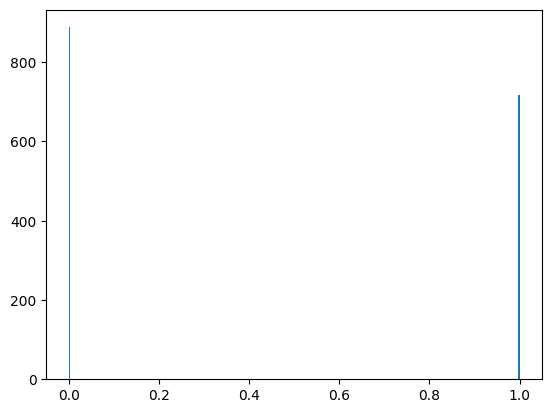

In [89]:
import matplotlib.pyplot as plt
Abandonaron = df_new['Abandono']
plt.hist(Abandonaron,bins=300)

El histograma revela que los datos entre los alumnos que se estima que abandonaron la materia y los que no estan bastante balanceados, por lo que no se espera que la salida de la regresion este sesgada

In [110]:
h1 = pd.concat([df_resis['Carrera'],df_new['Abandono']],axis=1)
h2 = pd.concat([df_resis['Anho'],df_new['Abandono']],axis=1)
h3 = pd.concat([df_resis['Ciclo'],df_new['Abandono']],axis=1)
h1,h2,h3

(           Carrera  Abandono
 548     MEC-PLS13          1
 555     MEC-PLS13          1
 558     MEC-PLS13          1
 562     MEC-PLS13          1
 1128    CIV-PLS13          1
 ...            ...       ...
 174496  CIV-PLS13          0
 174500  CIV-PLS13          0
 174921  CIV-PLS13          0
 175008  MEC-PLS13          1
 175297  IND-PLS13          0
 
 [1606 rows x 2 columns],
         Anho  Abandono
 548     2021         1
 555     2021         1
 558     2022         1
 562     2022         1
 1128    2021         1
 ...      ...       ...
 174496  2022         0
 174500  2022         0
 174921  2021         0
 175008  2021         1
 175297  2022         0
 
 [1606 rows x 2 columns],
         Ciclo  Abandono
 548         1         1
 555         2         1
 558         1         1
 562         2         1
 1128        1         1
 ...       ...       ...
 174496      1         0
 174500      2         0
 174921      1         0
 175008      2         1
 175297      2       

In [115]:
h1_mean = h1.groupby(['Carrera']).mean() #PORCENTAJE DE ABANDONO DE LA MATERIA POR CARRERA
h2_mean = h2.groupby(['Anho']).mean() #PORCENTAJE DE ABANDONO DE LA MATERIA POR AÑO
h3_mean = h3.groupby(['Ciclo']).mean() #PORCENTAJE DE ABANDONO DE LA MATERIA POR CICLO
h1_mean,h2_mean,h3_mean
#A CONTINUACION GRAFICAMOS ESTOS DATOS

(            Abandono
 Carrera             
 CIV-PLS13   0.385621
 ELE-PLS13   0.505308
 IND-PLS13   0.451128
 MEC-PLS13   0.625000,
       Abandono
 Anho          
 2021  0.483516
 2022  0.416856,
        Abandono
 Ciclo          
 1      0.489884
 2      0.414661)

In [113]:
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart1 = value_plot(h1_mean, *['Abandono'], **{})
chart2 = value_plot(h2_mean, *['Abandono'], **{})
chart3 = value_plot(h3_mean, *['Abandono'], **{})
chart1

In [108]:
chart2

In [114]:
chart3

In [90]:
df_new.to_csv("drive/My Drive/1er_Parcial_IA/Datos_Etiquetados.csv",index=False)